In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

def plot_fit_series(series, label, deg=3):
    plt.scatter(series.index, series, label=label, s=9)
    plt.plot(*Polynomial.fit(series.index, series, deg).linspace(), ls='dashed', label='_'+label, lw=1)

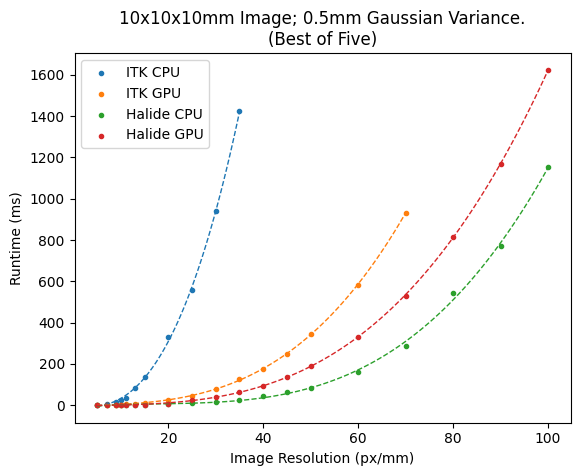

In [2]:
res = pd.read_csv('resolution-benchmark.csv', index_col=False)
res = res.groupby('res').min()   # best of 5

itk_cpu = res.itk_cpu.dropna()
itk_gpu = res.itk_gpu.dropna()
hal_cpu = res.itk_halide_cpu.dropna()
hal_gpu = res.itk_halide_gpu.dropna()

plot_fit_series(itk_cpu, 'ITK CPU')
plot_fit_series(itk_gpu, 'ITK GPU')
plot_fit_series(hal_cpu, 'Halide CPU')
plot_fit_series(hal_gpu, 'Halide GPU')

plt.title("10x10x10mm Image; 0.5mm Gaussian Variance.\n(Best of Five)")
plt.xlabel('Image Resolution (px/mm)')
plt.ylabel('Runtime (ms)')
_ = plt.legend()

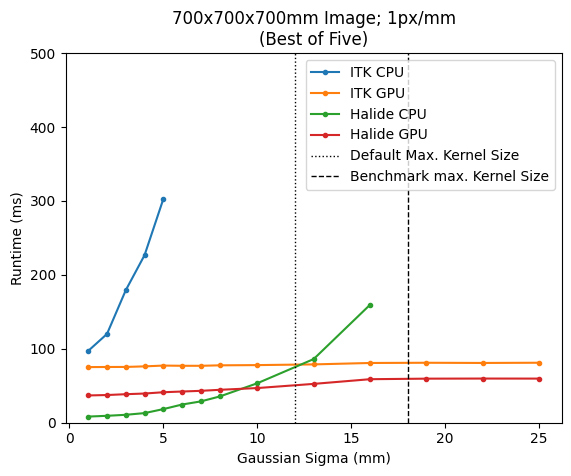

In [3]:
var = pd.read_csv('sigma-benchmark.csv', index_col=False)
var = var.groupby('sigma').min()  # best of 5

itk_cpu = var.itk_cpu.dropna()
itk_gpu = var.itk_gpu.dropna()
hal_cpu = var.itk_halide_cpu.dropna()
hal_gpu = var.itk_halide_gpu.dropna()

plt.plot(itk_cpu.index, itk_cpu, label='ITK CPU', marker='o', linestyle='solid', markersize=3)
plt.plot(itk_gpu.index, itk_gpu, label='ITK GPU', marker='o', linestyle='solid', markersize=3)
plt.plot(hal_cpu.index, hal_cpu, label='Halide CPU', marker='o', linestyle='solid', markersize=3)
plt.plot(hal_gpu.index, hal_gpu, label='Halide GPU', marker='o', linestyle='solid', markersize=3)

plt.axvline(12, lw=1, c='k', ls='dotted', label='Default Max. Kernel Size')
plt.axvline(18, lw=1, c='k', ls='dashed', label='Benchmark max. Kernel Size')

plt.title("700x700x700mm Image; 1px/mm\n(Best of Five)")
plt.xlabel('Gaussian Sigma (mm)')
plt.ylabel('Runtime (ms)')
plt.ylim(0,500)
_ = plt.legend()